# Project Overview


### 1. Import Libraries and Load Data

In [28]:
# Import necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set visual styles
%matplotlib inline
sns.set(style="whitegrid")

# Load dataset

data = pd.read_csv('Jobes_data.csv')


### 2. Data Overview and Initial Checks


In [2]:
# Display the first few rows of the dataset
data.head()

,Emp_id,Application_Date,Full_Name,Gender,Education_Level,Date_Birth,Email,Address,City,State,Zip_Code,Country,Years_of_Experience,Desired_Salary,Job_Title,Status
0,1001,03-06-2023,Scott Sheppard,Male,High School,31-08-1992,perezjanet@example.org,597 Smith Point,Hollandfort,NV,57588,Micronesia,8,60103.21,Chief Technology Officer,Interviewing
1,1002,15-05-2023,Stanley Lewis,Male,Bachelor'S Degree,29-04-1965,grossmark@example.com,8116 Stuart Loop,Port Margaretfurt,TN,14726,Greenland,17,64575.84,"Designer, Furniture",Rejected
2,1003,04-08-2023,Javier Li,Female,Phd,10-03-1973,katiemaldonado@example.com,5940 Barr Villages Suite 075,Dianaland,TX,4699,China,20,39422.71,"Sound Technician, Broadcasting/Film/Video",Rejected
3,1004,28-07-2023,Christopher Johnston,Other,High School,04-04-2001,sheila73@example.com,442 Lewis Mount,Youngfurt,GA,34455,Ghana,8,51045.11,Air Cabin Crew,Rejected
4,1005,05-06-2023,Melissa Hicks,Other,Master'S Degree,17-06-1978,emilypatterson@example.org,95961 Taylor Circles Apt. 169,East Ashleyborough,IN,21014,Solomon Islands,0,52792.86,Art Therapist,Interviewing


In [3]:
# Data overview
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Emp_id               3000 non-null   int64  
 1   Application_Date     3000 non-null   object 
 2   Full_Name            3000 non-null   object 
 3   Gender               3000 non-null   object 
 4   Education_Level      3000 non-null   object 
 5   Date_Birth           3000 non-null   object 
 6   Email                3000 non-null   object 
 7   Address              3000 non-null   object 
 8   City                 3000 non-null   object 
 9   State                3000 non-null   object 
 10  Zip_Code             3000 non-null   int64  
 11  Country              3000 non-null   object 
 12  Years_of_Experience  3000 non-null   int64  
 13  Desired_Salary       3000 non-null   float64
 14  Job_Title            3000 non-null   object 
 15  Status               3000 non-null   o

In [4]:
# Example of type conversions

data['Application_Date'] = pd.to_datetime(data['Application_Date'], format='%d-%m-%Y')  # Convert to datetime

data['Date_Birth']=pd.to_datetime(data['Date_Birth'],format='%d-%m-%Y')   # Convert to datetime

data['Gender'] = data['Gender'].astype('category')                      # Convert to category

data['Education_Level'] = data['Education_Level'].astype('category')    # Convert to category

data['Status'] = data['Status'].astype('category')                      # Convert to category

data['Zip_Code'] = data['Zip_Code'].astype('str')                       # Convert to string if required


### 3. Data Cleaning and Feature Engineering


**Analyze Yearly Trends:**


With `Application_Year`, we can analyze the number of applications by year, observing possible changes over time.

**Calculate Age:** 

With `Birth_year`, we can calculate age by subtracting it from the current year.


In [5]:
# extracts the year component from the Date_Birth column 

data['Birth_year']=data['Date_Birth'].dt.year

In [6]:
# extracts the year component from the Application_Date column 

data['Application_Year']= data['Application_Date'].dt.year

In [7]:
# Create an 'Age' column
data['Age'] = 2024 - data['Birth_year']  # Adjust year as necessary


**Description:**

Describe any derived columns, such as `Age` from `Birth_year` and `Application_year` from `Application_Date.`

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Emp_id               3000 non-null   int64         
 1   Application_Date     3000 non-null   datetime64[ns]
 2   Full_Name            3000 non-null   object        
 3   Gender               3000 non-null   category      
 4   Education_Level      3000 non-null   category      
 5   Date_Birth           3000 non-null   datetime64[ns]
 6   Email                3000 non-null   object        
 7   Address              3000 non-null   object        
 8   City                 3000 non-null   object        
 9   State                3000 non-null   object        
 10  Zip_Code             3000 non-null   object        
 11  Country              3000 non-null   object        
 12  Years_of_Experience  3000 non-null   int64         
 13  Desired_Salary       3000 non-nul

In [9]:
# Check for any null values or missing values
data.isnull().sum()

Emp_id                 0
Application_Date       0
Full_Name              0
Gender                 0
Education_Level        0
Date_Birth             0
Email                  0
Address                0
City                   0
State                  0
Zip_Code               0
Country                0
Years_of_Experience    0
Desired_Salary         0
Job_Title              0
Status                 0
Birth_year             0
Application_Year       0
Age                    0
dtype: int64

**Description:** Provide an overview of the dataset structure and check for missing values to decide on cleaning steps. Include initial observations here.

In [10]:
# Basic statistics for numerical columns

# Exclude 'Emp_id' and 'Zip_Code' and select other numerical columns
numerical_data = data.drop(columns=['Emp_id','Zip_Code']).select_dtypes(include=['int64', 'float64'])

# Get basic statistics for the remaining numerical columns
numerical_data.describe()


,Years_of_Experience,Desired_Salary
count,3000.000000,3000.000000
mean,9.964667,65079.057560
std,6.039998,20163.675071
min,0.000000,30047.220000
25%,5.000000,47307.807500
50%,10.000000,64934.865000
75%,15.000000,82585.595000
max,20.000000,99992.660000


### 4. Demographic Analysis

####  Gender Distribution:




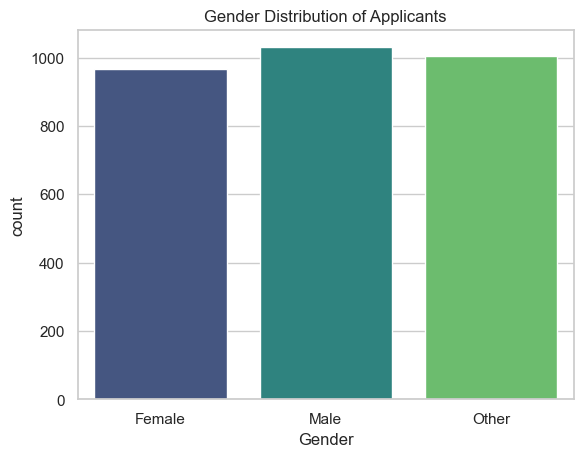

In [11]:
sns.countplot(data=data, x='Gender', palette='viridis')
plt.title("Gender Distribution of Applicants")
plt.show()


 **Description:** Analyze gender distribution and discuss findings, e.g., any gender imbalance in the applicant pool

#### Age Distribution:



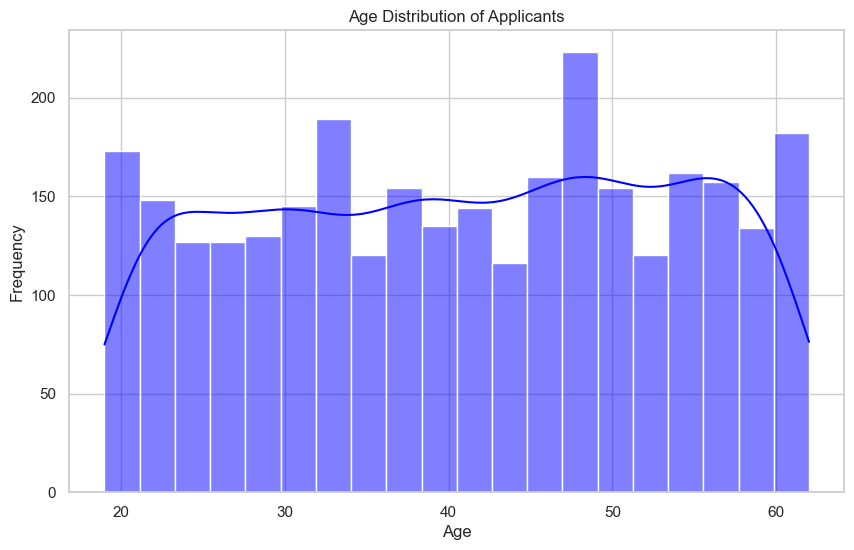

In [12]:
# Histogram for Age Distribution
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='Age', bins=20, kde=True, color='blue')
plt.title("Age Distribution of Applicants")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

**Description:** Explain the age distribution and the most common age range among applicants.


### 5. Education and Experience Analysis

#### Education Level:

Examine the levels of education in the dataset.

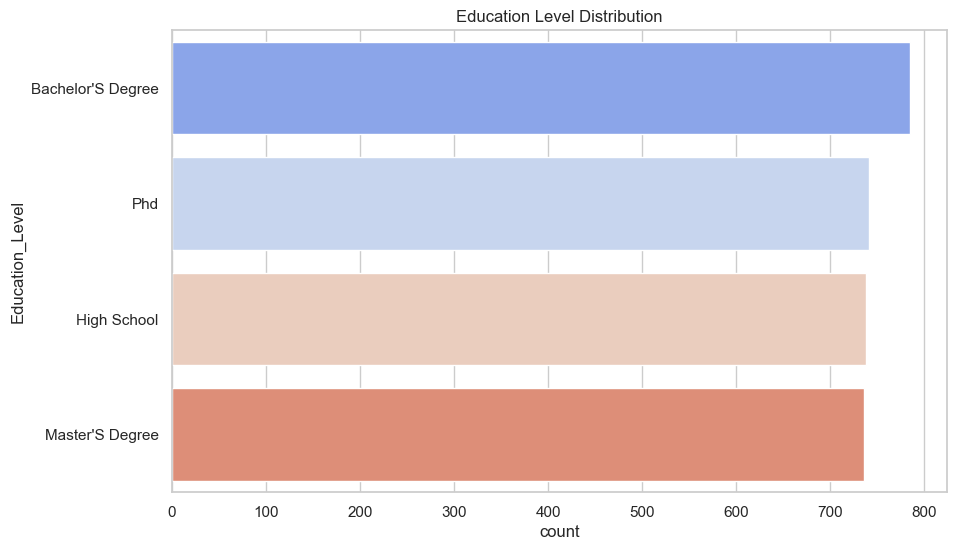

In [13]:
# Plot Education Level
plt.figure(figsize=(10, 6))
sns.countplot(data=data, y='Education_Level', order=data['Education_Level'].value_counts().index, palette='coolwarm')
plt.title("Education Level Distribution")
plt.show()

**Description:** Describe the education levels and experience distribution, providing insights into the applicant profile.

### Step 5: Geographic Analysis
Country and City Distribution

**Description:** Showcase the geographic spread, such as countries with the most applicants.


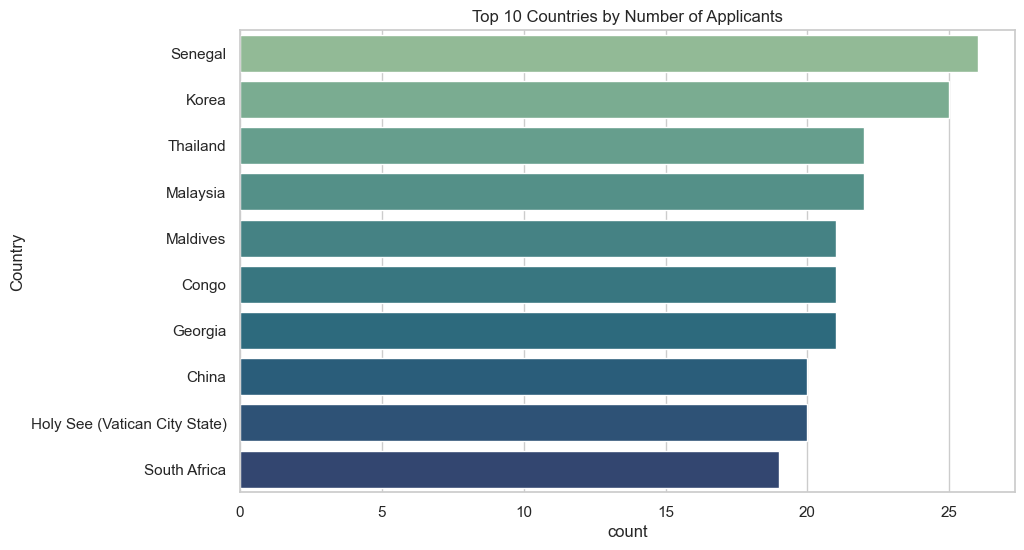

In [14]:
# Plot Country distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=data, y='Country', order=data['Country'].value_counts().index[:10], palette='crest')
plt.title("Top 10 Countries by Number of Applicants")
plt.show()

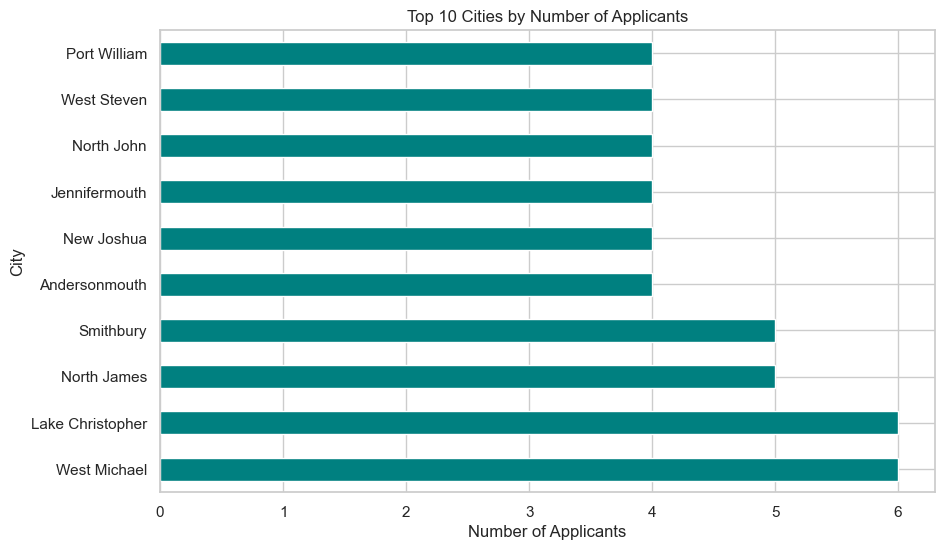

In [15]:
# Optional: City distribution for specific countries
plt.figure(figsize=(10, 6))
top_cities = data['City'].value_counts().head(10)
top_cities.plot(kind='barh', color='teal')
plt.title("Top 10 Cities by Number of Applicants")
plt.xlabel("Number of Applicants")
plt.ylabel("City")
plt.show()

### 6: Professional Insights
Years of Experience

Analyze experience distribution to understand applicant profiles.

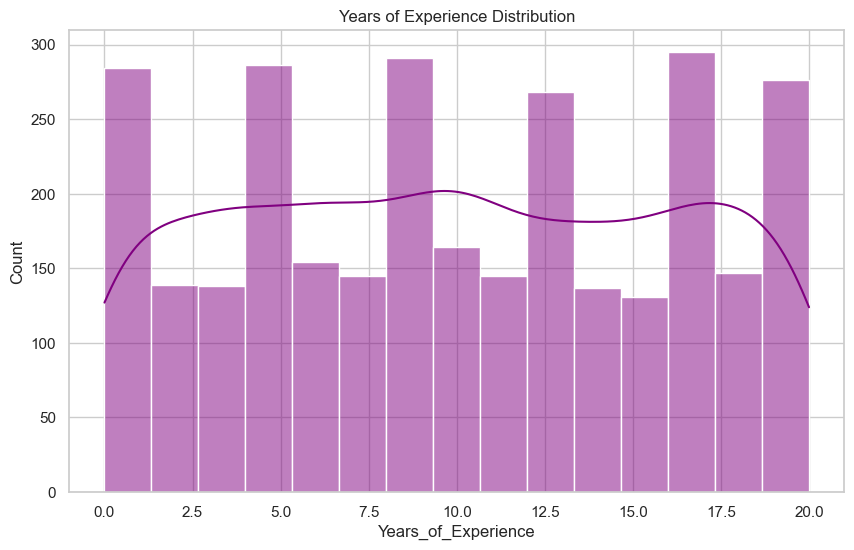

In [16]:
# Plot Years of Experience
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='Years_of_Experience', bins=15, kde=True, color='purple')
plt.title("Years of Experience Distribution")
plt.show()

#### Desired Salary

Examine desired salary trends.

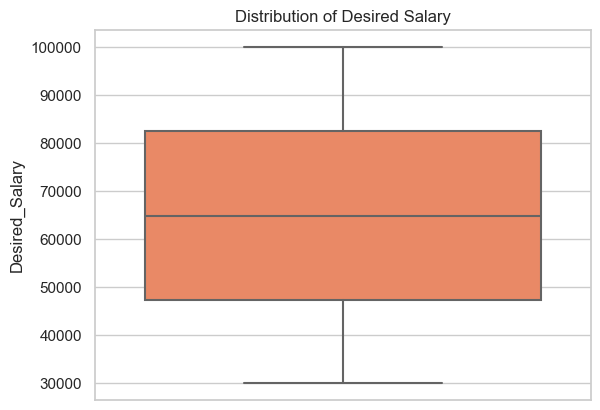

In [17]:
# Plot Desired Salary
sns.boxplot(data=data, y='Desired_Salary', color='coral')
plt.title("Distribution of Desired Salary")
plt.show()

### 7: Application Status Analysis

Examine the status of applications.

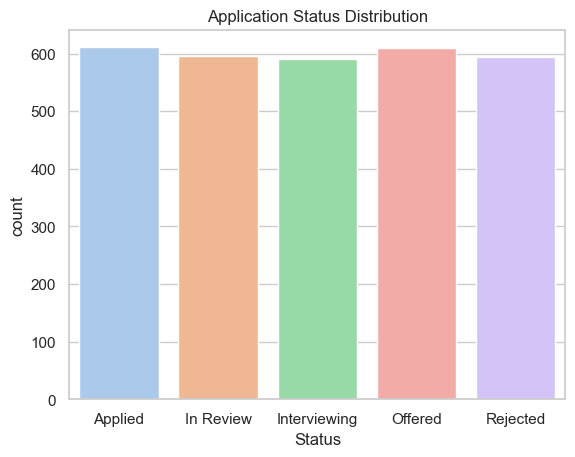

In [18]:
# Plot Application Status
sns.countplot(data=data, x='Status', palette='pastel')
plt.title("Application Status Distribution")
plt.show()


###  Step 8: Correlation and Cross-Analysis

#### Salary vs. Experience

Check if salary expectations are related to experience.

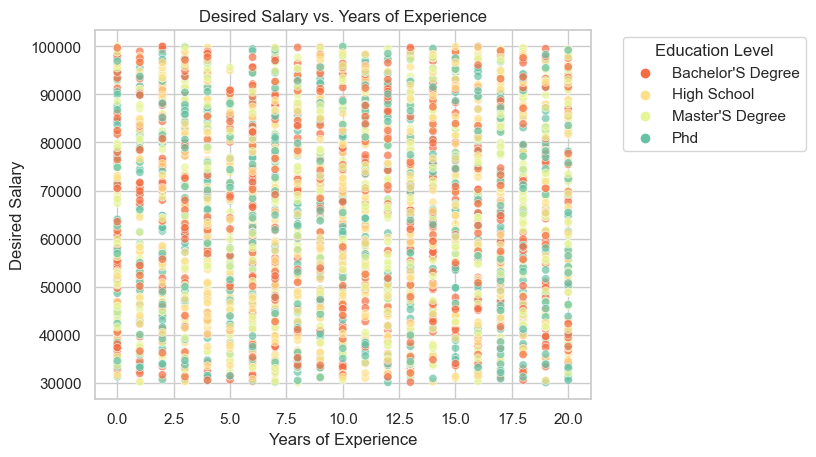

In [19]:
# Plot Salary vs. Years of Experience
sns.scatterplot(data=data, x='Years_of_Experience', y='Desired_Salary', hue='Education_Level', palette='Spectral', alpha=0.7)
plt.title("Desired Salary vs. Years of Experience")
plt.xlabel("Years of Experience")
plt.ylabel("Desired Salary")
plt.legend(title="Education Level", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

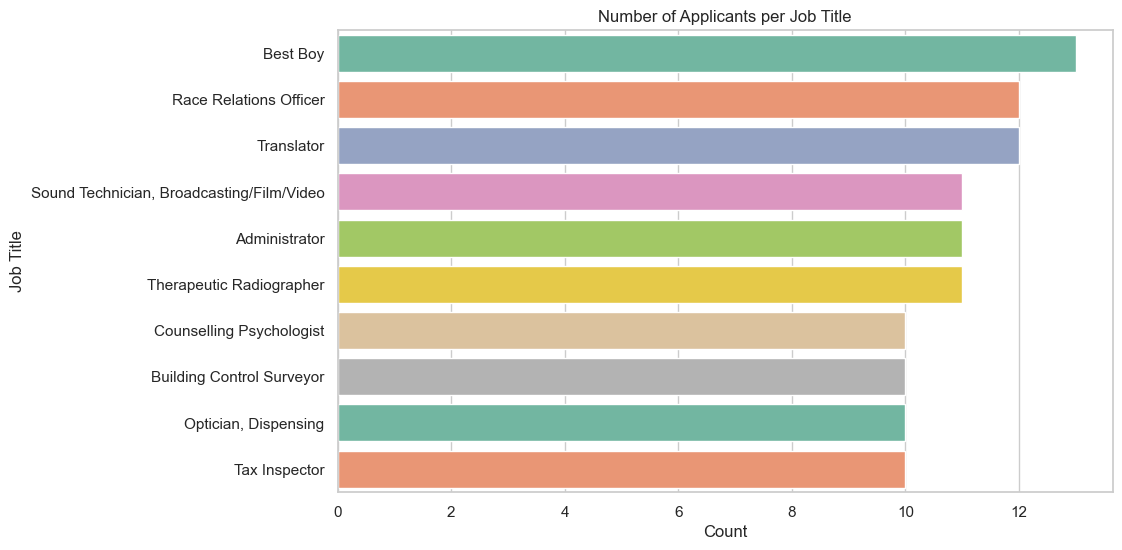

In [20]:
# Bar plot for Job Title distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=data, y='Job_Title', order=data['Job_Title'].value_counts().index[:10], palette='Set2')
plt.title("Number of Applicants per Job Title")
plt.xlabel("Count")
plt.ylabel("Job Title")
plt.show()

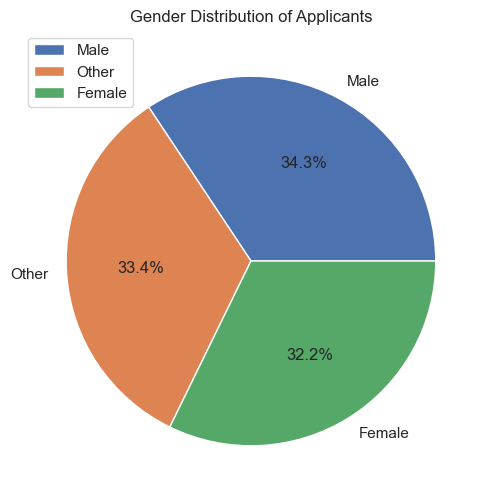

In [21]:
# Pie chart for Gender Distribution
gender_counts = data['Gender'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%')
plt.title("Gender Distribution of Applicants")
plt.legend(loc=0)
plt.show()

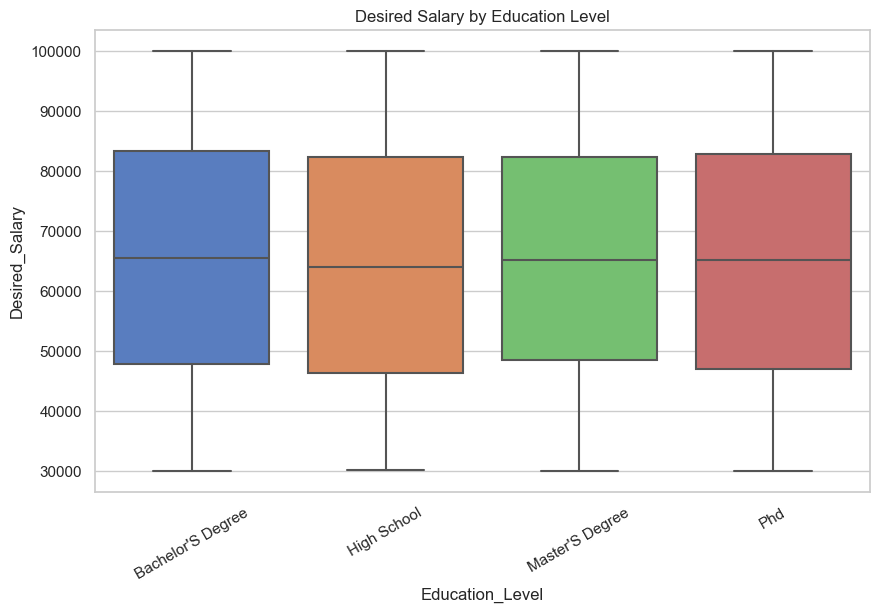

In [22]:
# Box plot for Desired Salary by Education Level
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='Education_Level', y='Desired_Salary', palette='muted')
plt.title("Desired Salary by Education Level")
plt.xticks(rotation=30)
plt.show()


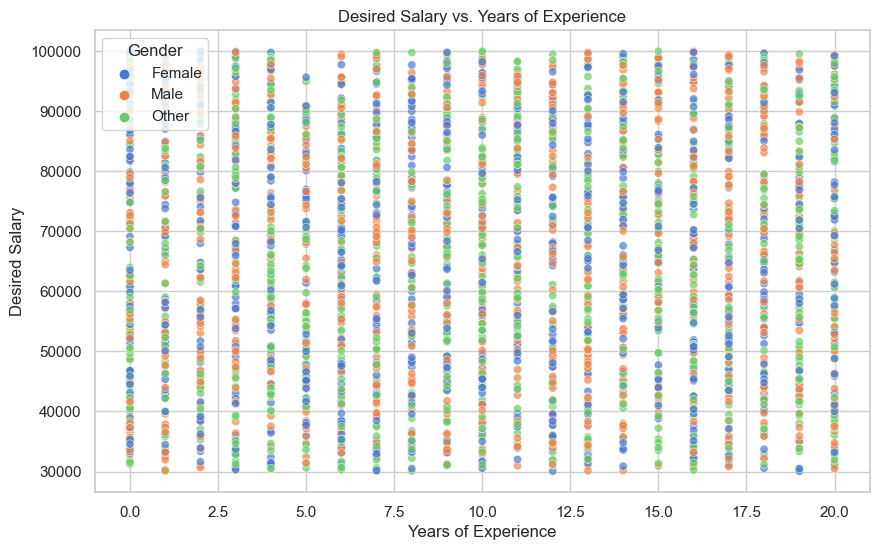

In [23]:
# Scatter plot for Desired Salary vs. Years of Experience
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Years_of_Experience', y='Desired_Salary', hue='Gender', palette='muted', alpha=0.7)
plt.title("Desired Salary vs. Years of Experience")
plt.xlabel("Years of Experience")
plt.ylabel("Desired Salary")
plt.legend(title="Gender",loc=2)
plt.show()

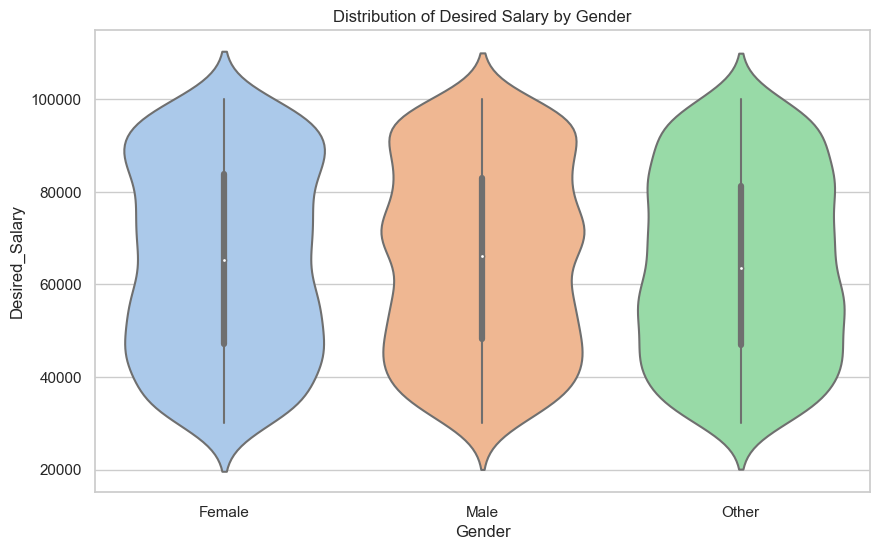

In [24]:
# Violin plot for Desired Salary by Gender
plt.figure(figsize=(10, 6))
sns.violinplot(data=data, x='Gender', y='Desired_Salary', palette='pastel')
plt.title("Distribution of Desired Salary by Gender")
plt.show()

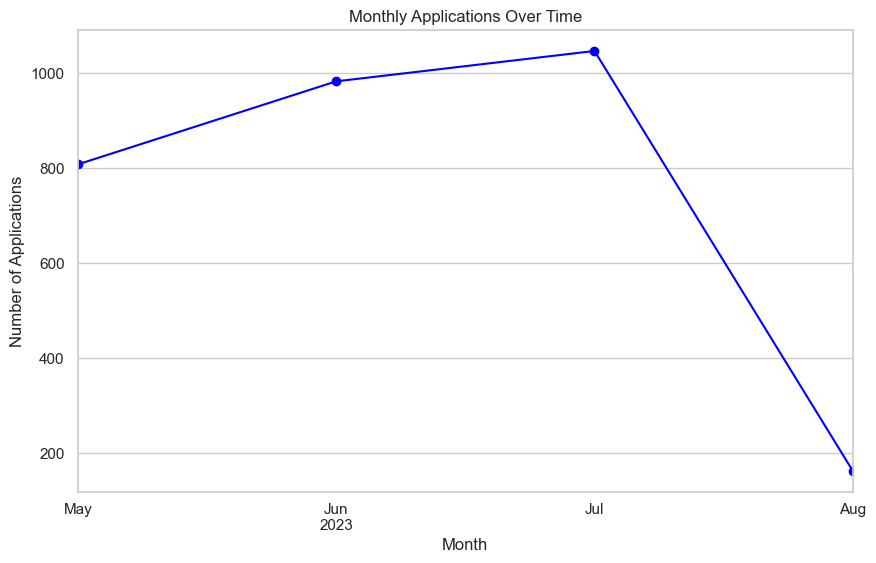

In [25]:
# Extract month and year from Application_Date

data['Application_Month'] = data['Application_Date'].dt.to_period('M')
monthly_applications = data['Application_Month'].value_counts().sort_index()

# Plot Line chart for monthly applications
plt.figure(figsize=(10, 6))
monthly_applications.plot(kind='line', marker='o', color='blue')
plt.title("Monthly Applications Over Time")
plt.xlabel("Month")
plt.ylabel("Number of Applications")
plt.show()

In [26]:
# For datetime columns, calculate only min and max (date range)
data[['Application_Date', 'Date_Birth']].agg(['min', 'max'])


,Application_Date,Date_Birth
min,2023-05-06,1962-08-07
max,2023-08-05,2005-08-01


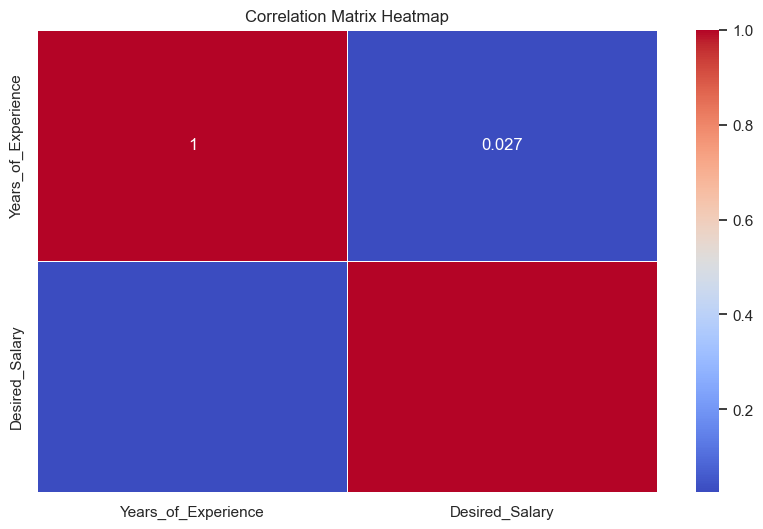

In [27]:

# Exclude 'Emp_id' and 'Zip_Code' and select other numerical columns
numerical_data = data.drop(columns=['Emp_id', 'Zip_Code']).select_dtypes(include=['int64', 'float64'])

# Calculate the correlation matrix
correlation_matrix = numerical_data.corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 6))

# Create a heatmap for the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)

# Title of the heatmap
plt.title("Correlation Matrix Heatmap")

# Show the plot
plt.show()


## 9. Summary of Findings and Insights


- **Age and Experience:** Most applicants are between 25-35 years old and have moderate experience levels.

- **Gender Distribution:** Balanced gender distribution among applicants.

- **Salary Trends:** Higher desired salaries are associated with applicants having more years of experience.

- **Geographic Concentration:** The majority of applicants are from specific countries, which could be explored further for recruiting.

# The End


# Thank you for reading